# 1. Importing Tools

In [1]:
# Importing Standard EDA Libraries
import pandas as pd
from pandas import set_option
import numpy as np

# Importing Statistical Analysis Libraries
from scipy import stats

# Importing Data Visualization Libraries
import matplotlib.pyplot as plt
# plots should appear in notebook
%matplotlib inline
import seaborn as sns

# Visualization Themes & Styles
plt.style.use('ggplot')
sns.set_theme(style = "darkgrid", palette = "pastel")

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Classification Model Evaluators & Feature Engineering Tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import LabelEncoder

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# 2. Importing Data

In [2]:
# Import Cleaned Bank Marketing Data
df = pd.read_csv("bank_marketing_preprocessed_data.csv")

In [3]:
# View Dataframe to Ensure One-Hot Encoded Features are Retained
df.head(10)

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,contact,month,poutcome,loan,y
0,0,58,2143,5,261,1,-1,0,4,1,2,0,1,2,8,3,0,0
1,1,44,29,5,151,1,-1,0,9,2,1,0,1,2,8,3,0,0
2,2,33,2,5,76,1,-1,0,2,1,1,0,1,2,8,3,1,0
3,3,47,1506,5,92,1,-1,0,1,1,3,0,1,2,8,3,0,0
4,4,33,1,5,198,1,-1,0,11,2,3,0,0,2,8,3,0,0
5,5,35,231,5,139,1,-1,0,4,1,2,0,1,2,8,3,0,0
6,6,28,447,5,217,1,-1,0,4,2,2,0,1,2,8,3,1,0
7,7,42,2,5,380,1,-1,0,2,0,2,1,1,2,8,3,0,0
8,8,58,121,5,50,1,-1,0,5,1,0,0,1,2,8,3,0,0
9,9,43,593,5,55,1,-1,0,9,2,1,0,1,2,8,3,0,0


# 3. Data Preprocessing 

### 3.1 Defining The Features and Target

In [5]:
# Dropping irrelevant features
df.drop(["Unnamed: 0"], axis = 1, inplace = True)
df.head(10)

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,contact,month,poutcome,loan,y
0,58,2143,5,261,1,-1,0,4,1,2,0,1,2,8,3,0,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,2,8,3,0,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,2,8,3,1,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,2,8,3,0,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,2,8,3,0,0
5,35,231,5,139,1,-1,0,4,1,2,0,1,2,8,3,0,0
6,28,447,5,217,1,-1,0,4,2,2,0,1,2,8,3,1,0
7,42,2,5,380,1,-1,0,2,0,2,1,1,2,8,3,0,0
8,58,121,5,50,1,-1,0,5,1,0,0,1,2,8,3,0,0
9,43,593,5,55,1,-1,0,9,2,1,0,1,2,8,3,0,0


In [6]:
# Split the data into x and y
X = df.drop("y", axis = 1)

y = df.y.values

In [7]:
# Independent Variables (Features)
X.head(5)

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,contact,month,poutcome,loan
0,58,2143,5,261,1,-1,0,4,1,2,0,1,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,2,8,3,1
3,47,1506,5,92,1,-1,0,1,1,3,0,1,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,2,8,3,0


In [8]:
# Target Variable
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### 3.2 Training and Test Split

In [9]:
# Set random seed for consistency and reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables
                                                    y, # dependent variables
                                                    test_size = 0.2) # percentage of data to use for test set

# Sizes of test & training sets
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is: ", X_test.shape)
print("The shape of y_train is:", y_train.shape)
print("The shape of y_test is: ", y_test.shape)

The shape of X_train is: (27972, 16)
The shape of X_test is:  (6994, 16)
The shape of y_train is: (27972,)
The shape of y_test is:  (6994,)


# 4. Modeling

### 4.1 Baseline Modeling

In [10]:
# Put models in a dictionary
models = {"SVC": SVC(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "Gradient Boost Classifier": GradientBoostingClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data
    X_test: testing data
    y_train: labels associated with training data
    y_test: labels associated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Lopp through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [11]:
# Obtain scores for models
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

{'SVC': 0.9173577352016014,
 'Logistic Regression': 0.916213897626537,
 'Random Forest': 0.9336574206462682,
 'Decision Tree': 0.8984844152130398,
 'Gradient Boost Classifier': 0.929368029739777}

In [13]:
# Creating dataframe of model scores
model_compare = pd.DataFrame(model_scores, index = ['Accuracy'])
model_compare

,SVC,Logistic Regression,Random Forest,Decision Tree,Gradient Boost Classifier
Accuracy,0.917358,0.916214,0.933657,0.898484,0.929368


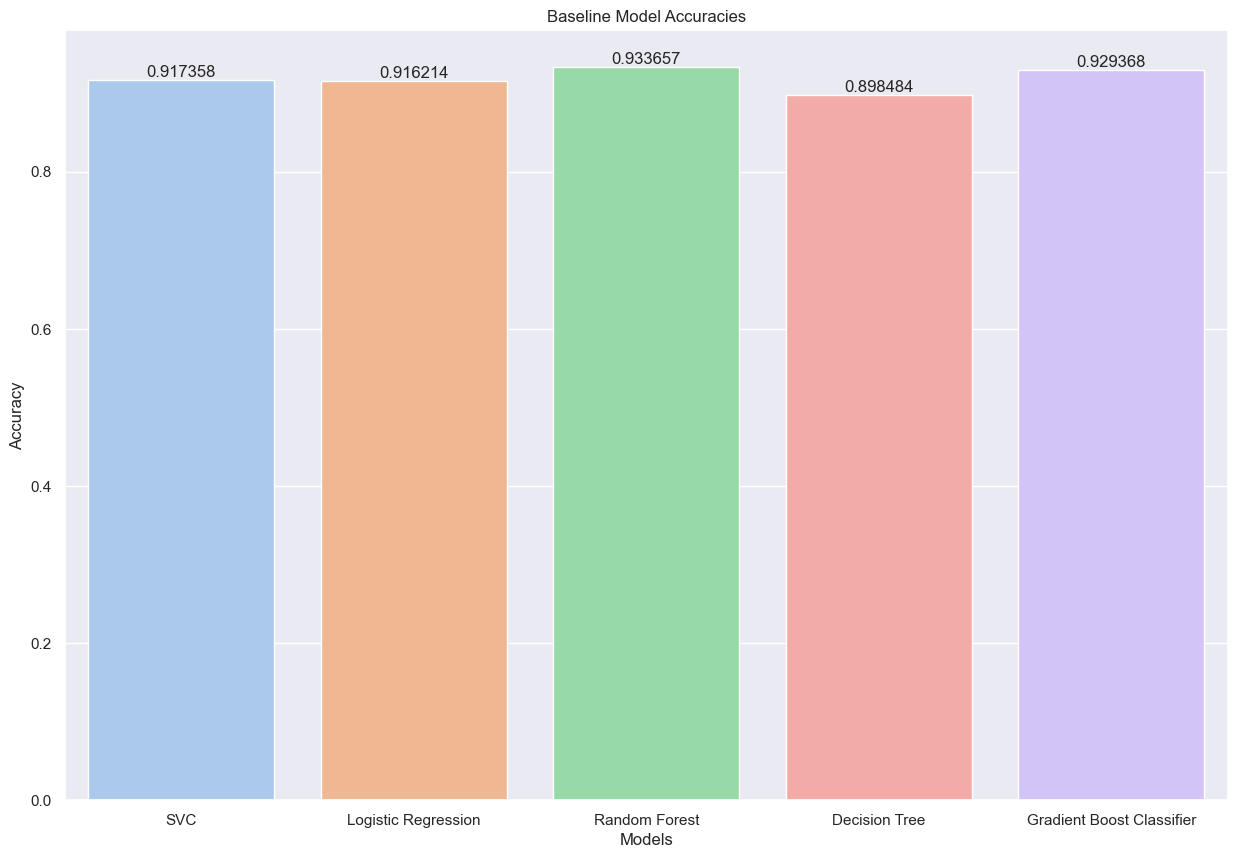

In [15]:
# Plot model results
plt.figure(figsize = (15, 10))
plt.title("Baseline Model Accuracies")
plt.xlabel("Models")
plt.ylabel("Accuracy")
model_plot = sns.barplot(data = model_compare)
model_plot.bar_label(model_plot.containers[0]);

### 4.2 Cost-Sensitive Learning

In [17]:
# Put Cost Sensitve Learning models in a dictionary
csl_models = {"SVC": SVC(class_weight = 'balanced'),
              "Logistic Regression": LogisticRegression(class_weight = 'balanced'),
              "Random Forest": RandomForestClassifier(class_weight = 'balanced'),
              "Decision Tree": DecisionTreeClassifier(class_weight = 'balanced'),}

# Obtain scores for Cost Sensitive Learning models
csl_model_scores = fit_and_score(models = cost_sensitive_learning_models,
                                          X_train = X_train,
                                          X_test = X_test,
                                          y_train = y_train,
                                          y_test = y_test)

csl_model_scores

{'SVC': 0.7044609665427509,
 'Logistic Regression': 0.758221332570775,
 'Random Forest': 0.9307978267086073,
 'Decision Tree': 0.9047755218758936}

Model accuracies have been **reduced** for every model with `Cost-Sensitive Learning` except for the `Decision Tree Classifier` model. Therefore, we will stick with the baseline `Random Forest` model and tune its hyperparameters to improve the model's accuracy even more.

# 5. Hyperparameter Tuning and Cross-Validation

In [18]:
# Different RandomForestClassifier() hyperparameters
rf_clf_grid = {'n_estimators': [100, 500, 1000],
         'max_depth': [None, 5, 10],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [1, 2],
         'min_samples_leaf': [1, 2]}

# Setup random hyperparameter search for RandomForestClassifier
gs_rf_clf = GridSearchCV(RandomForestClassifier(),
                         param_grid = rf_clf_grid,
                         cv = 5,
                         verbose = True)

# Fit grid hyperparameter search model
gs_rf_clf.fit(X_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [19]:
# Check the best parameters
gs_rf_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [20]:
# Evaluate the model
gs_rf_clf.score(X_test, y_test)

0.9330855018587361

The baseline `Random Forest Classifier` outperforms the other baseline models with an accuracy of **93%**, and the `Random Forest Classifiers` with different sets of hyperparameters. Therefore, we will acquire cross-validated evaluation metrics for this model.

# 6. Cross-Validated Evaluation Metrics

### 6.1 Predictions

In [21]:
# Make predictions on test data with best model obtained through GridSearchCV
y_preds = gs_rf_clf.predict(X_test)

In [22]:
# Check predictions
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
# Check test set
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[6322   94]
 [ 374  204]]


### 6.2 Confusion Matrix

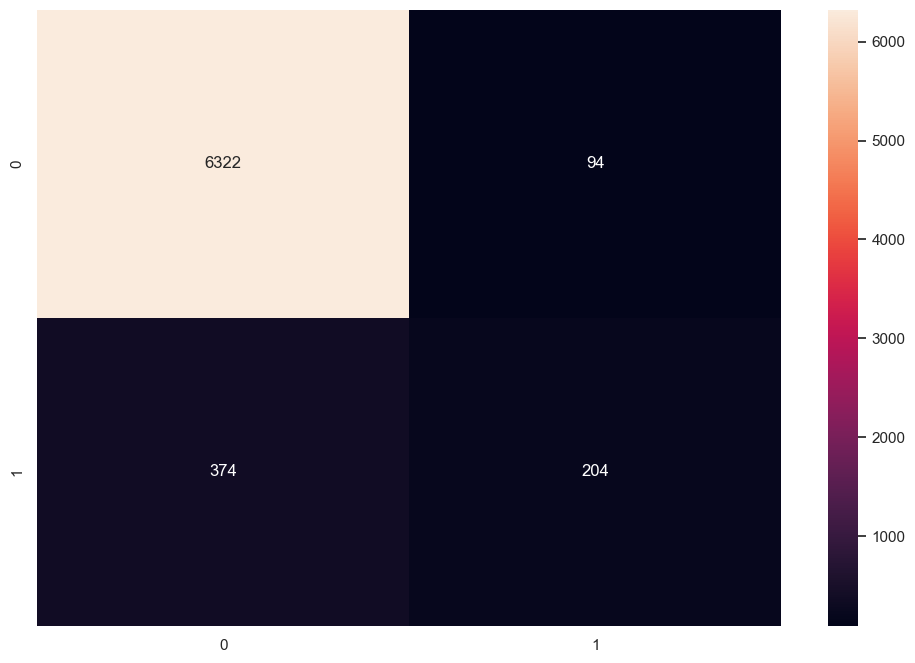

In [26]:
# Visualizing confusion matrix
def plot_conf_mat(y_test, y_preds):
  """ 
  Plots a confusion matrix using Seaborn's heatmap().
  """
  # Create heatmap
  fig, ax = plt.subplots(figsize = (12, 8))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot = True, # Annotate Boxes
                   fmt = 'g')

plot_conf_mat(y_test, y_preds)

### 6.3 Classification Report

In [27]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      6416
           1       0.68      0.35      0.47       578

    accuracy                           0.93      6994
   macro avg       0.81      0.67      0.72      6994
weighted avg       0.92      0.93      0.92      6994



### 6.4 Cross-Validated Metrics

In [31]:
# Instantiate Baseline Random Forest Classifier
clf = RandomForestClassifier()

# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv = 5, # 5-fold cross-validation
                         scoring = "accuracy") # accuracy as scoring

cv_acc

array([0.91635688, 0.8026598 , 0.88302588, 0.67553268, 0.63263263])

In [33]:
# Average of cross-validated accuracy
cv_acc = np.mean(cv_acc)
cv_acc

0.7820415742348829

We achieved a 5 folds cross-validated accuracy of **~78%** with the `Random Forest Classifier`.

In [41]:
# Average cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv = 5, # 5-fold cross-validation
                                       scoring = "precision")) # precision as scoring
cv_precision

0.3215845890101884

In [42]:
# Average cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv = 5, # 5-fold cross-validation
                                    scoring = "recall")) # recall as scoring
cv_recall

0.3145167798961863

In [43]:
# Average Cross-validated F1-Score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv = 5, # 5-fold cross-validation
                                scoring = "f1")) # f1 as scoring
cv_f1

0.16187123118593752

In [44]:
# Visualizng cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                         index = [0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.782042,0.321585,0.314517,0.161871


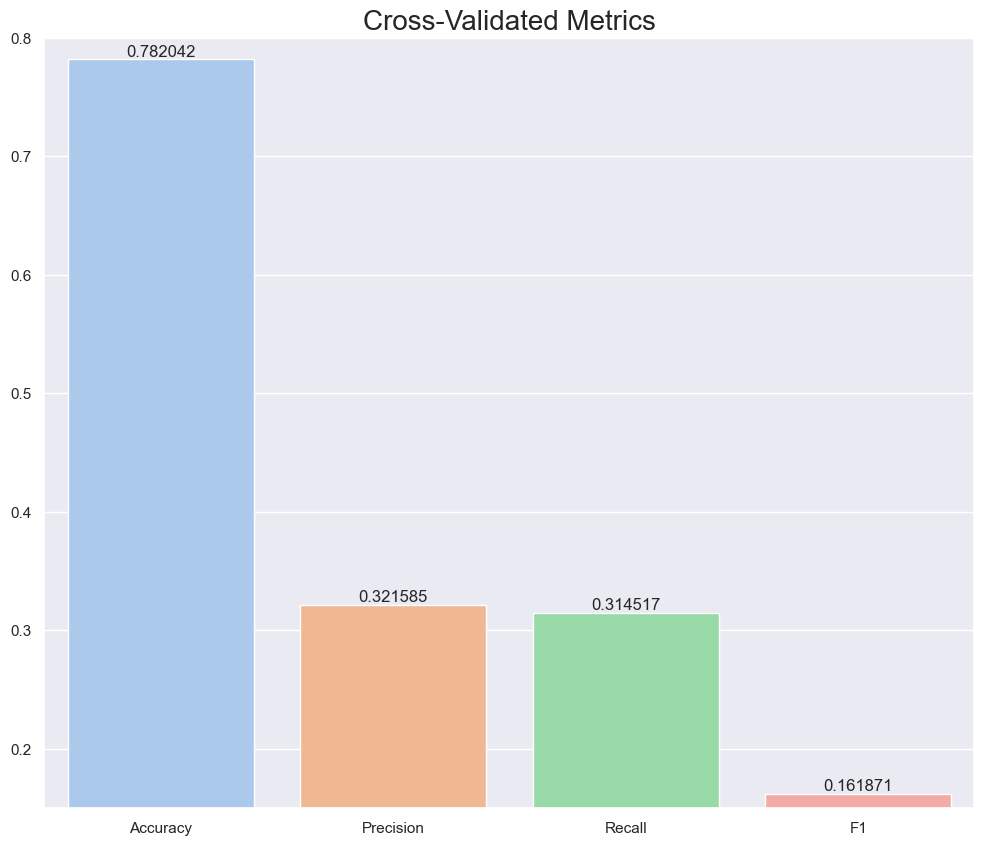

In [47]:
# Plot of Cross-Validated Metrics
plt.figure(figsize = (12, 10))
cv_metrics_plot = sns.barplot(data = cv_metrics)
cv_metrics_plot.set_title("Cross-Validated Metrics", fontsize = 20)
cv_metrics_plot.bar_label(cv_metrics_plot.containers[0]);
plt.ylim(0.15, 0.8);

# 7. Feature Importance

In [35]:
# Fit an instance of RandomForestClassifier()
clf.fit(X_train, y_train);

In [36]:
# Check coefficients
clf.feature_importances_

array([0.11611881, 0.11358085, 0.09513834, 0.19208526, 0.03375936,
       0.06736335, 0.0292137 , 0.05062954, 0.02369013, 0.02951532,
       0.0017648 , 0.03559268, 0.02207359, 0.1087534 , 0.07067775,
       0.01004312])

In [37]:
# Match features to columns in dataframe
feature_importances_s = pd.Series(clf.feature_importances_, index = X.columns)

In [38]:
# Converting series to dataframe
feature_importance_df = feature_importances_s.to_frame('value').T
feature_importance_df

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,contact,month,poutcome,loan
value,0.116119,0.113581,0.095138,0.192085,0.033759,0.067363,0.029214,0.05063,0.02369,0.029515,0.001765,0.035593,0.022074,0.108753,0.070678,0.010043


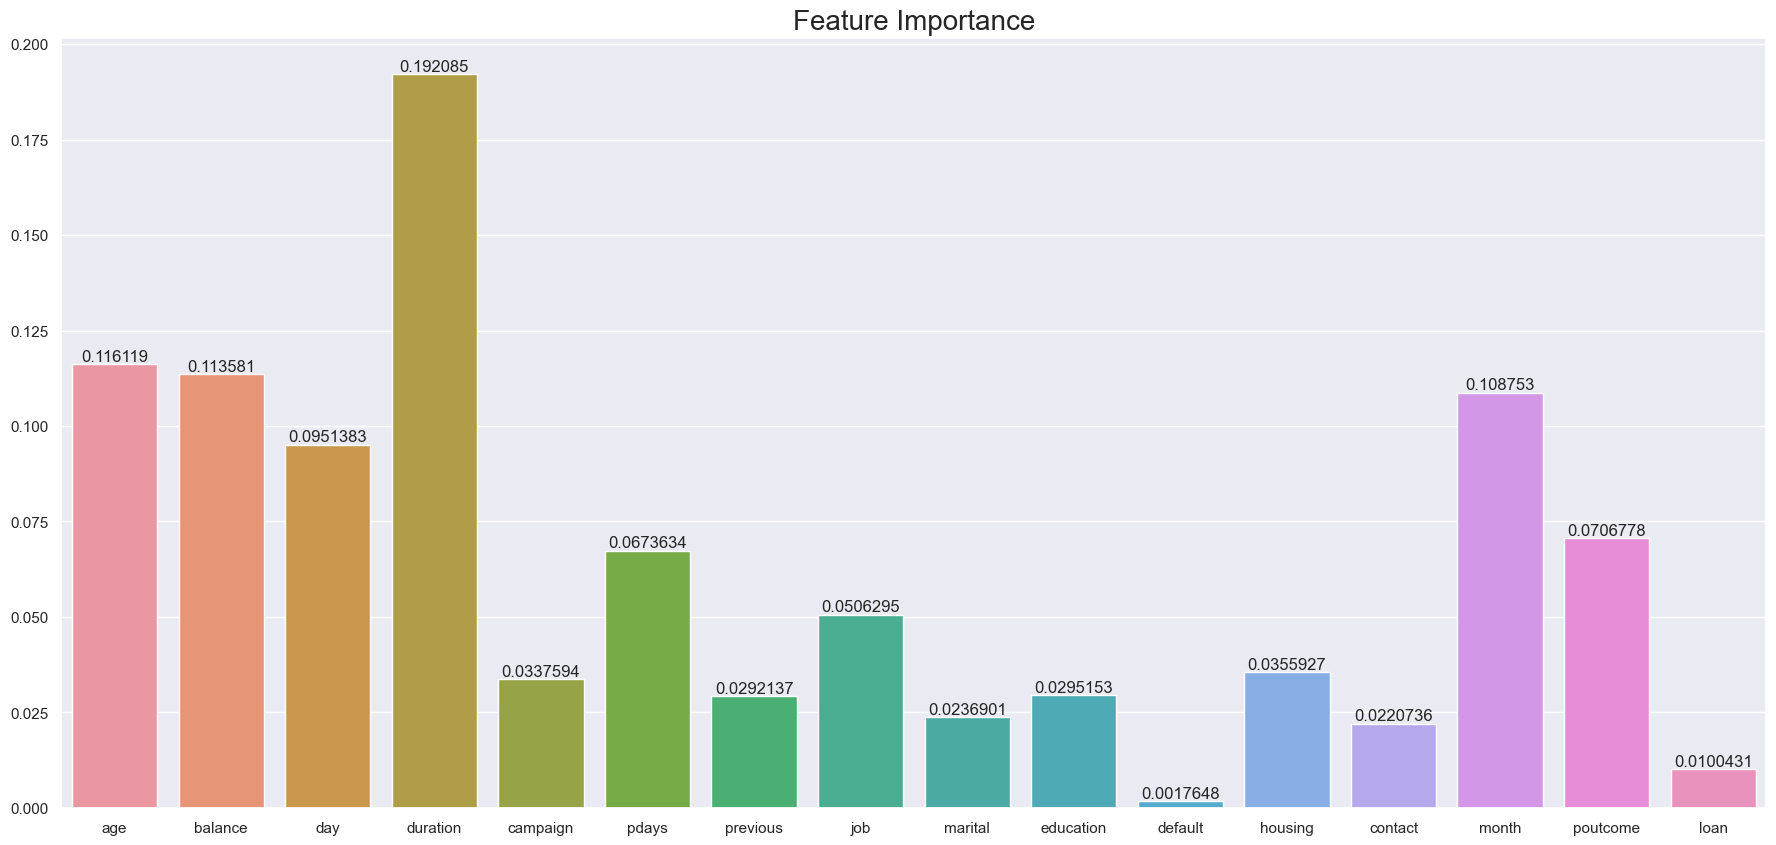

In [39]:
# Visualize feature importance
plt.figure(figsize = (22, 10))
feature_importance_plot = sns.barplot(data = feature_importance_df)
feature_importance_plot.set_title("Feature Importance", fontsize = 20)
feature_importance_plot.bar_label(feature_importance_plot.containers[0]);

# 8. Saving Models

Saving the baseline `Random Forest Classifier` using the **joblib** library.

In [40]:
from joblib import dump

# Save model to file
dump(clf, filename = "rf_clf_bank_marketing_classifier.joblib")

['rf_clf_bank_marketing_classifier.joblib']